# Задание №4
Изучение зависимости мощности критерия Уилкоксона от альфа и дельта для выборок распределения 

$ X1 \sim \alpha N(0,1) + (1 - \alpha) N(2, 4)$

$ X2 \sim \alpha N(0,1) + (1 - \alpha) N(2, 4) + \delta$

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sns
import pandas as pd

Сгенерируем выборки с нужными распределениями:

In [29]:
A1 = []
A2 = []
B1 = []
B2 = []
l = 10000
for i in range(0, l):
    A1.append(np.random.normal(loc = 0, scale = 1, size = 150))
    B1.append(np.random.normal(loc = 2, scale = 4, size = 150))
    A2.append(np.random.normal(loc = 0, scale = 1, size = 150))
    B2.append(np.random.normal(loc = 2, scale = 4, size = 150))
A1 = np.array(A1)
A2 = np.array(A2)
B2 = np.array(B2)
B1 = np.array(B1)

In [49]:
def alfa2ind(alfa):
    return 10*alfa
def ind2alfa(ind):
    return 0.1*ind
def delta2ind(delta):
    return (delta + 1)*20
def ind2delta(ind):
    return ind/20 - 1

Теперь можно посчитать мощность критерия Уилкоксона для всех афльа от 0 до 1 и всех дельта от -1 до 1. Заметим, что при дельта равном 0, по сути этот счетчик считает количество ошибок первого рода, из которой в дальнейшем можно оценить консервативность.

In [63]:
power = []
al = 0.05
for a in range(0, 11):
    power.append([])
    alfa = ind2alfa(a)
    for d in range(0, 41):
        delta = ind2delta(d)
        X1 = alfa*A1 + (1 - alfa)*B1
        X2 = alfa*A2 + (1 - alfa)*B2 + delta
        count = 0
        for i in range(0, l):
            _, w = st.wilcoxon(X1[i], X2[i])
            if w < al: count += 1
        power[a].append(count/l)
power = np.array(power)

Посмотрим зависимость мощности критерия от альфа и дельта:

Text(0, 0.5, 'power')

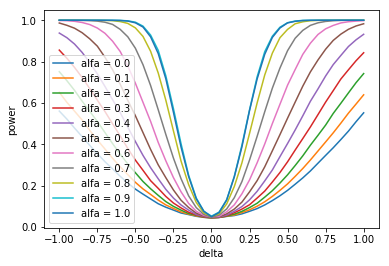

In [76]:
leg_string = []
for a in range(0, 11):
    plt.plot(ind2delta(np.arange(0, 41)), power[a, :])
    leg_string.append('alfa = ' + str(round(ind2alfa(a), 1)))
plt.legend(leg_string, loc=3)
plt.xlabel('delta')
plt.ylabel('power')

Видно, что при больших альфа график сужается, так как дисперсия получаемой случайной величины уменьшается. 

Посмотрим на вероятность ошибки первого рода:

In [80]:
cons = power[:, 20]
print(cons)

[0.0443 0.0437 0.0443 0.0454 0.0456 0.0463 0.0485 0.0477 0.0503 0.0523
 0.0493]


Как можно видеть, ошибка первого рода меньше альфа в среднем, а значит, можно сказть, что критерий консервативен.